In [29]:
import numpy as np
from array import array
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [30]:
dirin='/home/rdavis39/CLIM470/CLIM-470-Numerical-Weather-Prediction/ProgramData/'
zDfil='highgeopot.dat'
uDfil='highuwind.dat'
vDfil='highvwind.dat'
topo_file = "hightopo.dat"

In [86]:
ntime=3
nx=48
ny=16
recl=(nx*ny)*4
z_bin=np.zeros((ntime,nx,ny))
u_bin=np.zeros((ntime,nx,ny))
v_bin=np.zeros((ntime,nx,ny))
topo_bin=np.zeros((ny,nx))

In [87]:
ds_topo_bin = open(dirin+topo_file,'rb')

tmp = ds_topo_bin.read(recl)
tmp1 = array('f',tmp)
#tmp2=tmp1[1:-1] #for fortran sequential
ds_topo_bin=np.reshape(tmp1,(ny,nx))

In [88]:
ds_z_bin = open(dirin+zDfil,'rb')
for t in range(ntime):
    tmp = ds_z_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    z_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_z_bin,tmp,tmp1

In [89]:
ds_u_bin = open(dirin+uDfil,'rb')
for t in range(ntime):
    tmp = ds_u_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    u_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_u_bin,tmp,tmp1

In [90]:
ds_v_bin = open(dirin+vDfil,'rb')
for t in range(ntime):
    tmp = ds_v_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    v_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_v_bin,tmp,tmp1

In [91]:
# calculate time mean
z_bin_mean = z_bin.mean(axis=0)
u_bin_mean = u_bin.mean(axis=0)
v_bin_mean = v_bin.mean(axis=0)

Text(0.5, 1.0, 'gh snapshot')

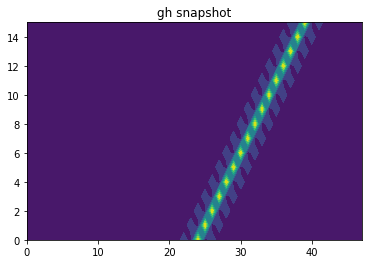

In [92]:
# plot one time 
fig, ax = plt.subplots()
zc = ax.contourf(ds_topo_bin)
ax.set_title('gh snapshot')

Text(0.5, 1.0, 'Time avg')

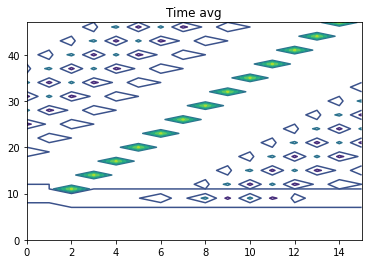

In [93]:
# plot the time average 
fig, ax = plt.subplots()
zc = ax.contour(z_bin_mean)
ax.set_title('Time avg')

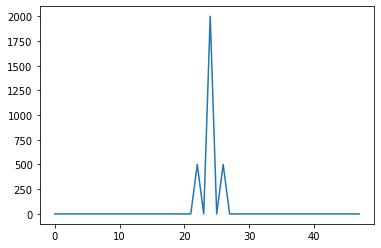

In [94]:
fig, ax = plt.subplots()
zc = ax.plot(ds_topo_bin[0,:])

Text(0.5, 1.0, 'gh snapshot')

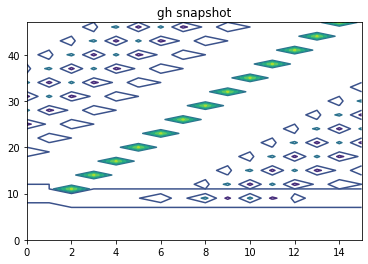

In [95]:
# plot one time 
fig, ax = plt.subplots()
zc = ax.contour(z_bin[-1,:,:])
ax.set_title('gh snapshot')

Text(0.5, 1.0, 'gh time mean')

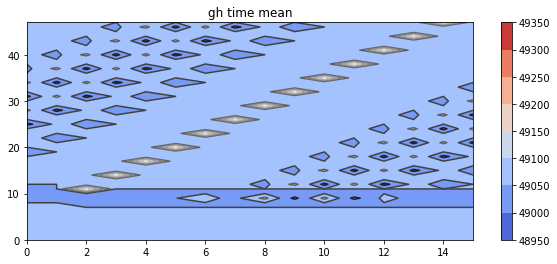

In [96]:
# plot filled contours
fig, ax = plt.subplots(figsize=(10,4))
zc = ax.contourf(z_bin_mean,cmap=cm.coolwarm)
plt.colorbar(zc)

# plot the contour lines using gray lines
zl = ax.contour(z_bin_mean,cmap=cm.gray)
ax.set_title('gh time mean')

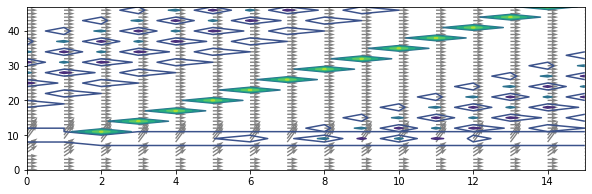

In [97]:
# Plot gh and wind vectors
fig, ax = plt.subplots(figsize=(10,3))
zc = ax.contour(z_bin_mean)
skip=(slice(None, None, 3), slice(None, None, 3))
x=np.arange(nx)
y=np.arange(ny)
zc = ax.quiver(u_bin_mean, v_bin_mean,color='grey')
